In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# 1. read data and visualize it
data = pd.read_csv('ex2data1.txt', header=None, names=['ExamA', 'ExamB', 'Admitted'])
# data.info() # 100rows

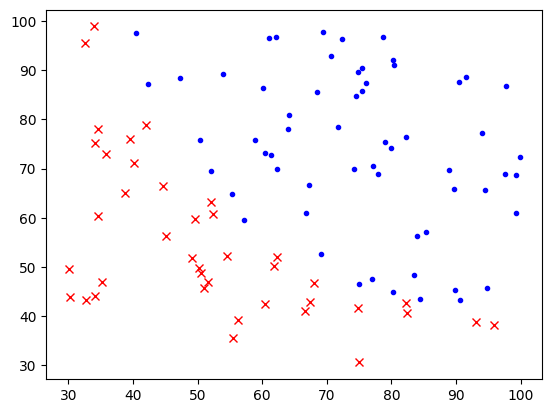

In [10]:
for i, fs in data.iterrows():
    if fs['Admitted'] == 0:
        plt.plot(fs['ExamA'], fs['ExamB'], c='red', marker='x')
    else:
        plt.plot(fs['ExamA'], fs['ExamB'], c='blue', marker='.')
plt.show()

In [14]:
# 这两个数据的范围都是0-100, 因此不需要 特征缩放
# 1. sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))
sigmoid(0)

0.5

In [57]:
# 2. 划分X, y, theta
n = data.shape[1]
data.(0, 'Ones', 1)

,Ones,ExamA,ExamB,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [81]:
X = np.matrix(data.iloc[:, 0:n-1])
y = np.matrix(data.iloc[:, n-1:n])
theta = np.matrix(np.zeros(n-1))
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

In [82]:
# 定义代价函数
def costFunc(X, y, theta):
    m = len(y)
    h_x = sigmoid(X*theta.T)
    return float((-y.T*np.log(h_x)-(1-y.T)*np.log(1-h_x))/m)
costFunc(X, y, theta)

0.6931471805599453

In [94]:
# 定义梯度下降函数
def gradientDescent(X, y, theta, iter_n, alpha):
    cost = np.zeros(iter_n)
    m = len(y)
    for i in range(iter_n):
        err = sigmoid(X*theta.T) - y
        delta = X.T*err/m
        cost[i] = costFunc(X, y, theta)
        theta = theta - alpha*delta.T
    return theta, cost

C:\Users\RefrainKruso\AppData\Local\Temp\ipykernel_20816\2109245899.py:5: RuntimeWarning: divide by zero encountered in log
  return float((-y.T*np.log(h_x)-(1-y.T)*np.log(1-h_x))/m)


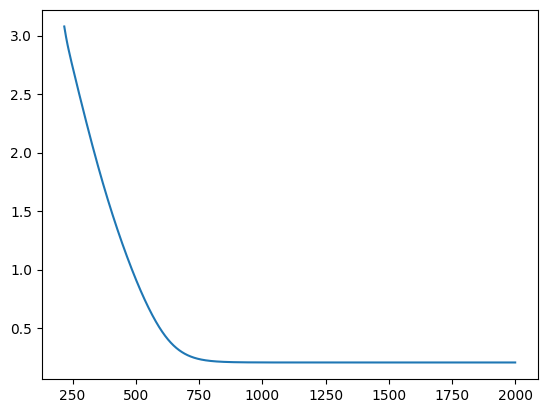

(0.20651168067356068, matrix([[-30.02499304,   0.24517859,   0.24078545]]))

In [168]:
alpha = 0.0003
iter_n = 2000
theta = np.matrix([-30, 2, 1])
theta, cost = gradientDescent(X, y, theta, iter_n, alpha)
plt.plot(range(iter_n), cost)
plt.show()
cost[-1], theta

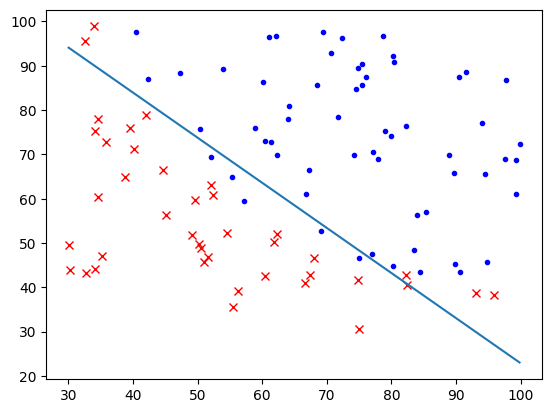

In [169]:
x = np.linspace(data['ExamA'].min(), data['ExamA'].max(), 100)
f = (-float(theta[:, 0])-float(theta[:, 1])*x)/float(theta[:, 2])
for i, fs in data.iterrows():
    if fs['Admitted'] == 0:
        plt.plot(fs['ExamA'], fs['ExamB'], c='red', marker='x')
    else:
        plt.plot(fs['ExamA'], fs['ExamB'], c='blue', marker='.')
plt.plot(x, f)